In [20]:
from scipy.io import loadmat
import numpy as np
import json
import matplotlib.pyplot as plt

Problem1Data = loadmat("/home/karanvora/Documents/New York University/Classes/Semester 1/Machine Learning/Assignments/Assignment 2/data3.mat")
Data = Problem1Data['data'].tolist()

HyperParameters = {
    "LearningRate" : 1,
    "MaximumIterations" : 50000,
    "Tolerance" : 0.00401
}

XData = []
YData = []

for values in range(len(Data)):
    TempArray = []
    TempArray.append(Data[values][0])
    TempArray.append(Data[values][1])
    TempArray.append(1)
    YData.append([Data[values][2]])
    XData.append(TempArray)

Data = np.array(Data)
XData = np.array(XData)
print(XData)
YData = np.array(YData)
print(YData)

[[ 0.02        0.0387758   1.        ]
 [ 0.62        0.08042959  1.        ]
 [ 0.25        0.05051723  1.        ]
 [ 0.16       -0.01654269  1.        ]
 [ 0.61        0.05445183  1.        ]
 [ 0.38       -0.04809097  1.        ]
 [ 0.84        0.19539254  1.        ]
 [ 0.84       -0.16671967  1.        ]
 [ 0.28       -0.00844278  1.        ]
 [ 0.6        -0.08044922  1.        ]
 [ 0.72       -0.14210363  1.        ]
 [ 0.18        0.01919401  1.        ]
 [ 0.85       -0.17364445  1.        ]
 [ 0.28        0.03762744  1.        ]
 [ 0.7         0.10863898  1.        ]
 [ 0.58       -0.0867244   1.        ]
 [ 0.47       -0.07180813  1.        ]
 [ 0.4         0.0151257   1.        ]
 [ 0.87       -0.16567804  1.        ]
 [ 0.57       -0.08513245  1.        ]
 [ 0.53        0.0428848   1.        ]
 [ 0.42        0.02303187  1.        ]
 [ 0.56       -0.08409614  1.        ]
 [ 0.45        0.03075502  1.        ]
 [ 0.74        0.147509    1.        ]
 [ 0.54        0.03026861

In [ ]:
def sign(y):
    y[y>=0]=1;y[y<0]=-1
    return y

Sample, Feature = Data.shape
MaximumIterations = HyperParameters['MaximumIterations']
LearningRate = HyperParameters['LearningRate']
Weights = np.random.random_sample((Feature, 1))
ErrorList = []
RiskList = []
Iterations = 0

while(Iterations < MaximumIterations):
    RandomInteger = np.random.randint(Sample)
    Output = XData[RandomInteger].reshape((1,3)).dot(Weights)
    Sign = np.multiply(YData[RandomInteger], Output)
    if(Sign[0][0] >= 0):
        #print(Sign)
        StepValue = 1
    elif(Sign[0][0] < 0):
        print(Sign)
        StepValue = -1

    if(StepValue == -1):
        print("1" + " Iteration : {}".format(Iterations))
        Weights += LearningRate * XData[RandomInteger].reshape((3,1)).dot(YData[RandomInteger].reshape((1,1)))
        Prediction = XData.dot(Weights)
        Error = float(np.count_nonzero(sign(Prediction) != YData)) / Sample
        ErrorList.append(Error)
        Iterations += 1
        print("2" + " Iteration : {}".format(Iterations))
        if(ErrorList[-1] == 0):
            print("Break")
            break

Break
817


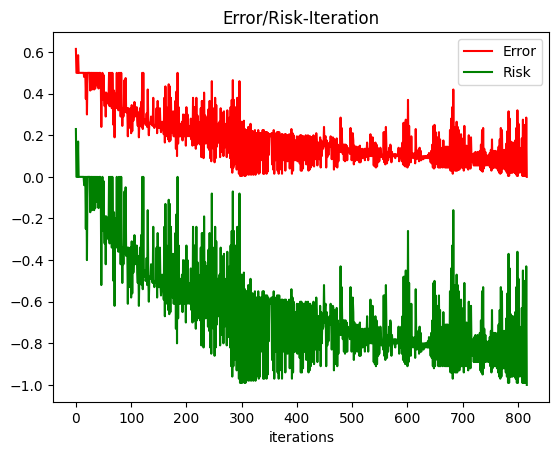

In [22]:
def sign(y):
    y[y>=0]=1;y[y<0]=-1
    return y

Sample, Feature = Data.shape
MaximumIterations = HyperParameters['MaximumIterations']
LearningRate = HyperParameters['LearningRate']
Weights = np.random.random_sample((Feature, 1))
ErrorList = []
RiskList = []
Iterations = 0

while(Iterations < MaximumIterations):
    RandomInteger = np.random.randint(Sample)
    Output = XData[RandomInteger].reshape((1,3)).dot(Weights)
    Sign = np.multiply(YData[RandomInteger], Output)
    if(Sign[0][0] >= 0):
        #print(Sign)
        StepValue = 1
    elif(Sign[0][0] < 0):
        #print(Sign)
        StepValue = -1

    if(StepValue == -1):
        #print("1" + " Iteration : {}".format(Iterations))
        Weights += LearningRate * XData[RandomInteger].reshape((3,1)).dot(YData[RandomInteger].reshape((1,1)))
        Prediction = XData.dot(Weights)
        
        Counter = 0
        StepPrediction = []
        for values in range(len(Prediction)):
            if(Prediction[values][0] >= 0):
                StepPrediction.append([1])
            elif(Prediction[values][0] < 0):
                StepPrediction.append([-1])
        
        for values in range(len(StepPrediction)):
            if(StepPrediction[values][0] != YData[values][0]):
                Counter += 1
        
        Error = float(Counter) / Sample
        ErrorList.append(Error)

        Multiply = np.multiply(-YData, Prediction)
        Risk = []
        for values in range(len(Multiply)):
            if(Multiply[values][0] >= 0):
                Risk.append([1])
            elif(Multiply[values][0] < 0):
                Risk.append([-1])
        
        SumRisk = float(np.sum(Risk)) / Sample
        RiskList.append(SumRisk)
        
        
        # # Error = float(np.count_nonzero(sign(Prediction) != YData)) / Sample
        # # ErrorList.append(Error)
        Iterations += 1
        # # print("2" + " Iteration : {}".format(Iterations))
        if(ErrorList[-1] == 0):
            print("Break")
            break

print(Iterations)
plt.figure(1)
plt.plot(range(Iterations), ErrorList,'r-',label='Error')
plt.plot(range(Iterations), RiskList, 'g-',label='Risk')
plt.xlabel('iterations')
plt.title('Error/Risk-Iteration')
plt.legend()
plt.show()

[[ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]

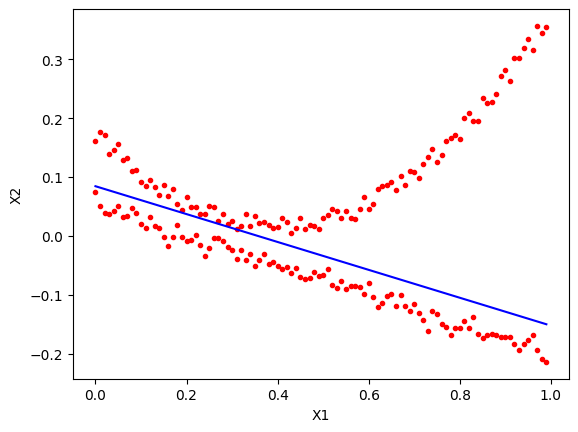

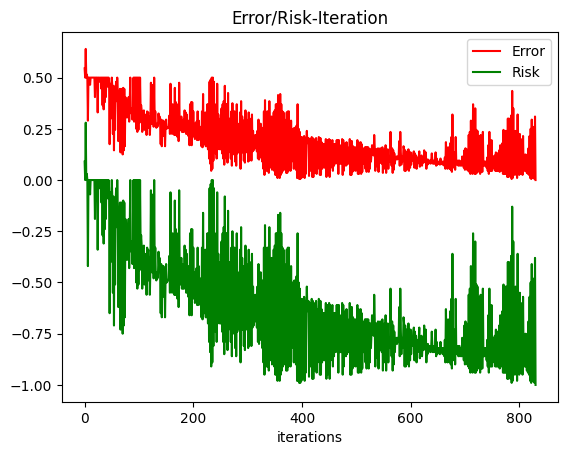

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from numpy import exp, log, absolute
from numpy.linalg import norm

def sign(y):
    y[y>=0]=1;y[y<0]=-1
    return y


def cal_risk(y, y_pred, N):
    assert(y.shape[-1]==1)
    risk = np.sum(sign(np.multiply(-y, y_pred)))
    return risk/N

def cal_error(y, y_pred, N):
    return float(np.count_nonzero(sign(y_pred)!=y))/N

def LR(x, y, opts):
    samples_num, features_num = x.shape
    max_iters  = opts['max_iters']
    lr         = opts['lr']
    weights    = np.random.random_sample((features_num, 1))
    error_list = []
    risk_list  = []
    iters      = 0

    while iters < max_iters:
        i = np.random.randint(samples_num)
        output = x[i].reshape((1,3)).dot(weights)
        # print(output, y[i])
        if sign(np.multiply(y[i],output))[0]==-1:
            weights += lr * x[i].reshape((3, 1)).dot(y[i].reshape((1,1)))
            y_pred = x.dot(weights)
            error_list.append(cal_error(y, y_pred, samples_num))
            risk_list.append(cal_risk(y, y_pred, samples_num))
            print(error_list[iters], iters)
            iters += 1
            if error_list[-1]==0:
                break

    
    return weights, iters, error_list, risk_list

def show_model(weights, x, y):
    plt.figure(0)
    samples_num = x.shape[0]
    for i in range(samples_num):
        plt.plot(x[i, 0], x[i, 1], 'r.')
    min_x = min(x[:, 0])
    max_x = max(x[:, 0])
    y_min_x = float(-weights[2] - weights[0] * min_x) / weights[1]
    y_max_x = float(-weights[2] - weights[0] * max_x) / weights[1]
    plt.plot([min_x, max_x], [y_min_x, y_max_x], '-b')
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

def show_err_trend(iters, error_list, risk_list):
    plt.figure(1)
    plt.plot(range(iters), error_list,'r-',label='Error')
    plt.plot(range(iters), risk_list, 'g-',label='Risk')
    plt.xlabel('iterations')
    plt.title('Error/Risk-Iteration')
    plt.legend()
    plt.show()

if __name__=="__main__":
    matdata = loadmat('data3.mat')
    _x = matdata['data'][:,:2]
    y  = matdata['data'][:,-1:]
    x  = np.concatenate((_x, np.ones((_x.shape[0],1))), axis=1)
    print(y)
    # print(x.shape)
    # print(y[0].shape, x[0].shape)
    max_iters = 5000
    opts  = {'max_iters': max_iters, 'lr': 1} 
    weights, iters, error_list, risk_list= LR(x, y, opts)
    # print(iters)
    show_model(weights, x, y)
    show_err_trend(iters, error_list, risk_list)


In [ ]:
y = [-1.1, -1, 1]
y = np.array(y)
def sign(y):
    y[y>=0]=1;y[y<0]=-1
    return y
print(sign(y))
print(np.count_nonzero(sign(y)))